# 使用最小二乘法拟合曲线
一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$


举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

/home/hzp/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hzp/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
def real_func(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

#残差
def residuals_func(p,x,y):
    ret = fit_func(p,x) - y
    return ret

In [5]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    M 是多项式的次数
    """
    # 初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    # leastsq最小化函数的平方和，得到一组参数
    p_lsq = leastsq(residuals_func, p_init, args=(x,y))
    print('Fitting Parameters:', p_lsq[0])
    
    plt.plot(x_points, real_func(x_points),label='real')
    plt.plot(x_points, fit_func(p_lsq[0],x_points), label= 'fitted curve')
    plt.plot(x,y,'bo', label='noise')
    plt.legend()
    return p_lsq

(array([0.0127129]), 1)
Fitting Parameters: [0.0127129]


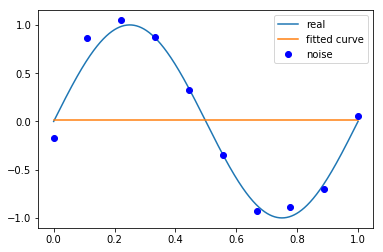

In [6]:
p_lsq_0 = fitting(M=0)

(array([-1.34441497,  0.68492039]), 1)
Fitting Parameters: [-1.34441497  0.68492039]


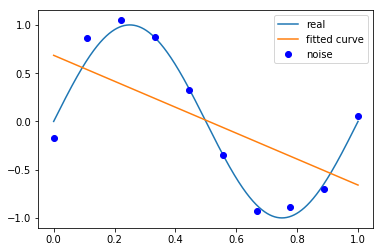

In [7]:
p_lsq_1 = fitting(M=1)

(array([ 23.12302125, -34.75114894,  11.88234135,  -0.12426312]), 3)
Fitting Parameters: [ 23.12302125 -34.75114894  11.88234135  -0.12426312]


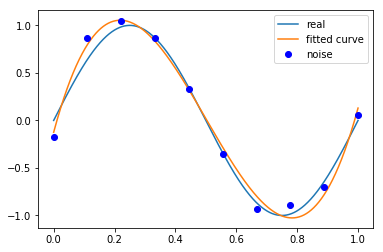

In [8]:
# M=3
p_lsq_3 = fitting(M=3)

(array([ 1.10601710e+04, -4.80232994e+04,  8.77130110e+04, -8.78054803e+04,
        5.25477013e+04, -1.91761589e+04,  4.16390604e+03, -5.14304018e+02,
        3.46833672e+01, -1.70651638e-01]), 2)
Fitting Parameters: [ 1.10601710e+04 -4.80232994e+04  8.77130110e+04 -8.78054803e+04
  5.25477013e+04 -1.91761589e+04  4.16390604e+03 -5.14304018e+02
  3.46833672e+01 -1.70651638e-01]


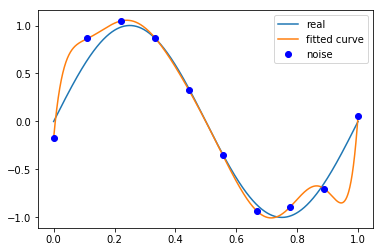

In [9]:
# M=9
p_lsq_9 = fitting(M=9)

In [10]:
# 加入正则化
regularization = 0.0001

#p是参数
def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    # 加上L2的正则化项，也就是加上所有参数的平方和求平方根
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret

In [11]:
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

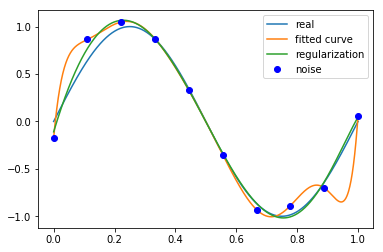

In [12]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()